In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
data = [
        ["Noise Watch","4.1 out of 5 star","3000","1500"],
        ["Firebolt Watch","4.1 out of 5 star","3000","1500"]
        ]
df = pd.DataFrame(data,columns = ["Product Name","Rating","Review Count","Price"])

In [3]:
df

,Product Name,Rating,Review Count,Price
0,Noise Watch,4.1 out of 5 star,3000,1500
1,Firebolt Watch,4.1 out of 5 star,3000,1500


In [4]:
url = "https://www.amazon.in/gp/bestsellers/watches/ref=zg_bs_nav_watches_0"
response = requests.get(url)
content = response.content
soup = BeautifulSoup(content)
heading_html = soup.find('h1',attrs={"class": "a-size-large a-spacing-medium a-text-bold"})
heading_html.get_text()

product_cards = soup.find_all("div",attrs={"id": "gridItemRoot"})

def get_product_details(product_card):
  name_html = product_card.find("a",attrs={"class": "a-link-normal"})
  if name_html:
    image = name_html.find('img')
    name = image.get('alt')
  else:
    name = ""

  rating_html = product_card.find('i',attrs={"class":"a-icon a-icon-star-small a-star-small-4 aok-align-top"})
  if rating_html:
     rating = rating_html.get_text()
  else:
    rating = ""


  review_html = product_card.find('span',attrs={"class": "a-size-small"})
  if review_html:
     review_count = review_html.get_text()
  else:
    review_count = ""

  aRows_last_div = product_card.find_all('div',attrs={"class": "a-row"})[-1]

  price_html = aRows_last_div.find("span",{"class": "p13n-sc-price"})

  if price_html:
      price = price_html.get_text()

  else:
    price = ""




  return [name,rating,review_count,price ]


In [5]:
data = []
for product_card in product_cards:
  detail = get_product_details(product_card)
  data.append(detail)


In [6]:
data

[['Noise Twist Round dial Smart Watch with Bluetooth Calling, 1.38" TFT Display, up-to 7 Days Battery, 100+ Watch Faces, IP68, H',
  '4.1 out of 5 stars',
  '25,066',
  '₹1,399.00'],
 ['Noise Pulse Go Buzz Smart Watch with Advanced Bluetooth Calling, 1.69" TFT Display, SpO2, 100 Sports Mode with Auto Detection',
  '4.1 out of 5 stars',
  '40,797',
  '₹1,299.00'],
 ['Fastrack New Limitless X2 Smartwatch|1.91" UltraVU with Rotating Crown|60 Hz Refresh Rate|Advanced Chipset|SingleSync BT Call',
  '3.9 out of 5 stars',
  '8,594',
  '₹1,499.00'],
 ['Noise ColorFit Pulse Grand Smart Watch with 1.69"(4.29cm) HD Display, 60 Sports Modes, 150 Watch Faces, Fast Charge, Spo2, St',
  '4.0 out of 5 stars',
  '21,654',
  '₹1,099.00'],
 ['boAt Wave Lite Smart Watch w/ 1.69" (4.2 cm) HD Display, Sleek Metal Body, HR & SpO2 Level Monitor, 140+ Watch Faces, Activit',
  '3.9 out of 5 stars',
  '70,092',
  '₹999.00'],
 ['Fire-Boltt Phoenix Ultra Luxury Stainless Steel, Bluetooth Calling Smartwatch, AI Voi

In [7]:
df = pd.DataFrame(data,columns = ["Product Name","Rating","Review Count","Price"])

In [8]:
df

,Product Name,Rating,Review Count,Price
0,Noise Twist Round dial Smart Watch with Blueto...,4.1 out of 5 stars,"25,066","₹1,399.00"
1,Noise Pulse Go Buzz Smart Watch with Advanced ...,4.1 out of 5 stars,"40,797","₹1,299.00"
2,"Fastrack New Limitless X2 Smartwatch|1.91"" Ult...",3.9 out of 5 stars,"8,594","₹1,499.00"
3,Noise ColorFit Pulse Grand Smart Watch with 1....,4.0 out of 5 stars,"21,654","₹1,099.00"
4,"boAt Wave Lite Smart Watch w/ 1.69"" (4.2 cm) H...",3.9 out of 5 stars,"70,092",₹999.00
5,Fire-Boltt Phoenix Ultra Luxury Stainless Stee...,4.1 out of 5 stars,"72,756","₹1,799.00"
6,Casio Vintage A158WA-1DF Black Digital Dial Si...,,"43,322","₹1,695.00"
7,Fire-Boltt Ninja Call Pro Plus 46.48mm (1.83 i...,4.1 out of 5 stars,"69,394","₹1,399.00"
8,TIMEWEAR Analog Day Date Functioning Stainless...,3.8 out of 5 stars,"13,102",₹319.00
9,Sounce Silicone 22mm Replacement Watch Strap w...,4.2 out of 5 stars,"3,015",₹299.00


In [9]:
df.to_csv("amazon_watches_collections.cvs")

In [10]:
# pip install opencv-python

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

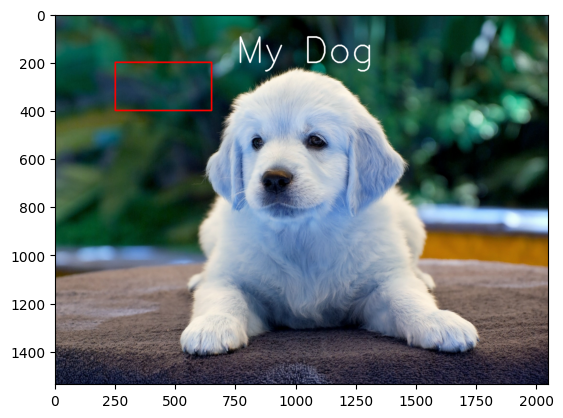

In [ ]:
image = cv2.imread("./Dog.jpg")
x = 250
y = 200
w = 400
h = 200

cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),5)
cv2.putText(image,"My Dog",(750,200),cv2.FONT_HERSHEY_SIMPLEX,5,(255,255,255),5)
plt.imshow(image)
plt.axis("on")
plt.show()
# image.shape
# while True:
#   cv2.imshow("My Dog Image",image)
#   if cv2.waitKey(1) == ord("q"):
#       break

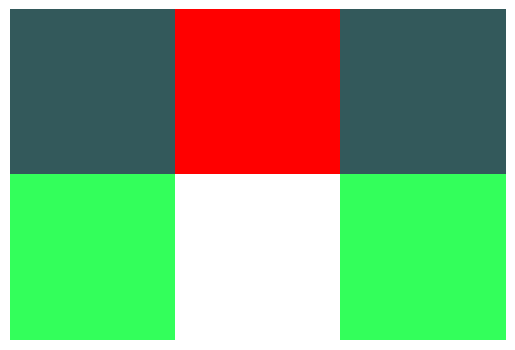

In [ ]:
new_image = np.array([[ 51,  89,  91],
        [ 255,  0,  0],
        [ 51,  89,  91],
         [ 51,  255,  91],
        [ 255,  255,  255],
        [ 51,  255,  91]])


new_image = new_image.reshape((2,3,3))
new_image.shape
plt.imshow(new_image)
plt.savefig("image.jpg")
plt.axis("off")
plt.show()

In [ ]:
image.shape

(1536, 2048, 3)

In [ ]:
ord("A")

65

In [ ]:
image

array([[[ 51,  89,  91],
        [ 51,  89,  91],
        [ 51,  89,  91],
        ...,
        [ 41, 100,  92],
        [ 43, 102,  94],
        [ 44, 103,  95]],

       [[ 51,  89,  91],
        [ 51,  89,  91],
        [ 50,  88,  90],
        ...,
        [ 41, 100,  92],
        [ 43, 102,  94],
        [ 44, 103,  95]],

       [[ 50,  88,  90],
        [ 50,  88,  90],
        [ 50,  88,  90],
        ...,
        [ 42, 101,  93],
        [ 46, 103,  95],
        [ 46, 103,  95]],

       ...,

       [[ 56,  61,  82],
        [ 47,  52,  73],
        [ 21,  27,  46],
        ...,
        [  7,   6,  26],
        [  8,   7,  27],
        [  7,   6,  26]],

       [[ 62,  67,  88],
        [ 57,  62,  83],
        [ 30,  36,  55],
        ...,
        [  6,   4,  23],
        [  5,   3,  23],
        [  2,   0,  20]],

       [[ 39,  44,  65],
        [ 42,  47,  68],
        [ 23,  29,  48],
        ...,
        [  1,   0,  18],
        [  2,   0,  20],
        [  3,   1,  21]]